----

### <span style="color:#0b486b">SIT744 Practical Machine Learning for Data Science</span>


----

# # <span style="color:#0b486b">Assignment One: Mastering Machine Learning Process</span>
### <span style="color:#0b486b">Due: 11:59 pm 18 August 2019 (Sunday)</span>

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **25%** to your final mark. Read the assignment instruction carefully.

This notebook has been prepared for you to complete Assignment 1. Some sections have been partially completed to help you get started. **The total marks for this notebook are 80 marks, which will be re-scaled to 25 marks in the grade.** 

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


## <span style="color:#0b486b">Instruction</span>

This assignment contains **three** parts, in increasing order of machine learning sophistication levels as we go through the process of building an effective machine learning solution.

* Part 1: Examine and understand your dataset **[10 points]**
* Part 2: Build Model Intuition: What Works and What doesn't **[57 points]**
* Part 3: Outlier/Anomaly Detection Survey: Write a Report to summarize at least 5 effective outlier/anomaly detection models and approaches published in recent 5 years **[13 points]**


**Hint**: this assignment was essentially designed based on the first three lectures and practical lab sessions. You are strongly recommended to go through these contents thoroughly which might help you complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to CloudDeakin. **By the due date, you are required to submit the following files to the corresponding Assignment in CloudDeakin**:

1.	<span style="color:red">**[YourID]\_assignment1\_solution.ipynb**</span>:  **this is your Python notebook solution source file**.
1.	<span style="color:red">**[YourID]\_assingment1\_output.html**</span>: **this is the output of your Python notebook solution *exported* in HTML format**.
1.	<span style="color:red">**[YourID]\_assingment1\_report.doc**</span>: **this is the report of your outlier detection survey work**.

For example, if your student ID is: 123456, you will then need to submit two files:
* 123456_assignment1_solution.ipynb
* 123456_assignment1_output.html
* 123456_assignment1_Report.doc

<span style="color:red">Now, please proceed to content below to complete your assignment!</span>

---

## <span style="color:#0b486b">Part 1: Examine and understand your dataset </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 10 points]**.<span></div>

This assignment shares a similar theme with the practical lab session in week 2. You are required to work with the NUS_WIDE data for the task of face recognition.

The first step in the process is to understand your data. You are given the following segments of codes
- to import necessary libraries, 
- to define a utility function to display face images from the dataset, and
- to load the dataset.

They are provided for you to get started. Please **do not** change the provided code as well the variables and function names as you will need them to complete subsequent tasks. 

---



**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the cell.

In [61]:
from sklearn import datasets
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt
import numpy as np
import statistics 
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# append your own importing packages here if needed

In [62]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))
    fig.show()

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the Anaconda prompt.

In [63]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=60, resize=0.4)

In [64]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target
print(faces.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


---

You should realise that executing the above segment of codes will result in:
- variable `faces` containing the fetched dataset
- variables `X` and `y` which contain the features and the labels respectively.

We first examine the NUS_WIDE dataset. You are asked to supply your own codes in the following cells to answer the following questions.

####  <span style="color:red">**Question 1.1**</span>. Print out the description of the dataset using the variable `faces`. 
<div style="text-align: right"><span style="color:red">**[0.5 points]**</span></div>

In [65]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print("the description of the dataset is given below:\n")
print(faces.DESCR)

the description of the dataset is given below:

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is ca

####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points in this dataset.
<div style="text-align: right"><span style="color:red">**[1.5 points]**</span></div> 

In [66]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(faces.keys())
noofdatapoints = len(np.unique(faces.images))
print("The number of data are",len(faces.data))
print("The number of target names are",len(target_names))
print("The number of images are",len(faces.images))
print("The number of unique images/data points are",len(np.unique((faces.images))))
print("the number of target variables are",len(faces.target))
# Student can use different field such as data, images target_names to get the number of data points 
print("So, there are 1346 data points and 766 unique data points in this dataset!")

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
The number of data are 1348
The number of target names are 8
The number of images are 1348
The number of unique images/data points are 766
the number of target variables are 1348
So, there are 1346 data points and 766 unique data points in this dataset!


####  <span style="color:red">**Question 1.3**</span>. Each class (or label) in this dataset corresponds to a public figure. Print out the number of classes, and the corresponding person name for each class. Print out 50 photos of *Ariel Sharon* and 50 photos of *Hugo Chavez*. You might decide to use the function `display_faces` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [67]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and the corresponding name of each class
class_ids=np.unique(y)
#print(class_ids)
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
classnames= np.array(lfw_people.target_names)
#for name in lfw_people.target_names:    
#    print(name)
for i in range(len(lfw_people.target_names)):
    print(str(class_ids[i])+" -> This class belongs to:"+(classnames[i]))
    
# [insert your code here]

#for i in range(len(class_ids)):
    # [insert your code here]

0 -> This class belongs to:Ariel Sharon
1 -> This class belongs to:Colin Powell
2 -> This class belongs to:Donald Rumsfeld
3 -> This class belongs to:George W Bush
4 -> This class belongs to:Gerhard Schroeder
5 -> This class belongs to:Hugo Chavez
6 -> This class belongs to:Tony Blair


The first 50 photos of Ariel Sharon are:



C:\Users\Ashutosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


The first 50 photos of Hugo Shavez are:



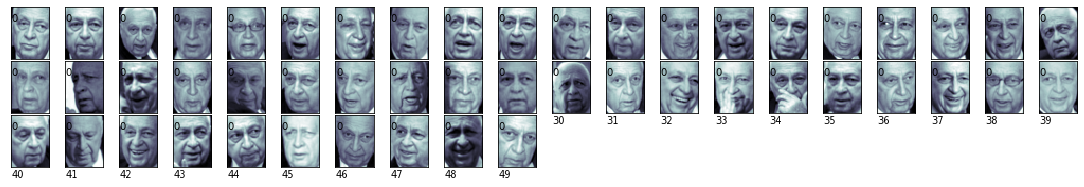

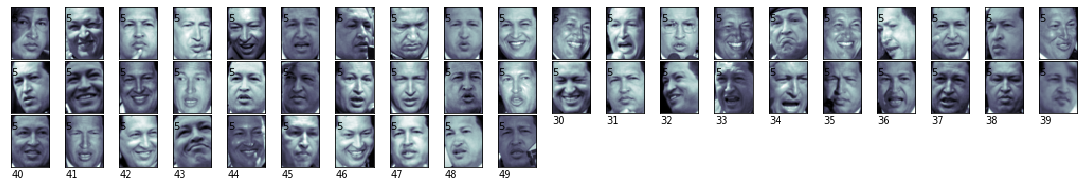

In [68]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print("The first 50 photos of Ariel Sharon are:\n")
display_faces(faces.images[y==0], faces.target[y==0], 50)
print("The first 50 photos of Hugo Shavez are:\n")
display_faces(faces.images[y==5], faces.target[y==5], 50)
# print out 50 photos of Ariel Sharon and 50 photos of Hugo Chavez

####  <span style="color:red">**Question 1.4**</span>. Given our problem of interest is face recognition, should we choose supervised or unsupervised machine learning methods? Explain why and list at least four ML algorithms that are suitable for this problem.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

##### Use this markdown cell to write your answer to this question.

 We should use supervised machine learning algorithm methods as the input labels are already provided in terms of pre-defined images of different celebs from different views with their specified classes(as labels) ranging from 0 to 7(in total 8). Now since we are required to correctly identify faces from an already provided dataset with labels, we can train them with the labels provided and predict the new values accordingly. Since machine has already learnt the things from previous data and this time have to use it wisely to correclty recognise the faces here so, it is more suitable and viable to use supervised machine learning algorithms. 
 The suitable ML algorithms that are suitable for this problem are:
 1)CNN ( convolution neural network )
 2)PCA (Principal Component Analysis)
 3)ICA (Independent Component Analysis)
 4)LDA ( Linear Discriminant Analysis)
 5)EP(Eigenspace-based adaptive approach)
 6)EBGM(Eigen Bunch Graph Matching)
 7)Kernel Methods
 8)Trace Transform
 9)AAM(Active Appearance Model)
 10)3-D Morphable Model
 11)HMM(Hidden Markov Model)
 12)SVM(Support Vector Machine)
 13)Bayesian Network
 14)3-D Face recognition

####  <span style="color:red">**Question 1.5**</span>. create *a single train-split* with 20% of data for testing and the rest for training.
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [69]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# split into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2) # [insert your codes here]

In [70]:
print("Number of training samples:\t" + str(len(X_train)))
print("Number of testing samples:\t" + str(len(X_test)))

Number of training samples:	1078
Number of testing samples:	270


---

### <span style="color:#0b486b">Part 2: Build Model  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 70 points]**.<span></div>

After we have gained a good understanding of the dataset from the previous step, we should by now be clear of the following points:

- Do you have labels for this data? And hence, is it a supervised learning or unsupervised learning problem?
- Recall that machine learning prediction is about learning a function $y= f(x)$, where $y$ is your label. Python variables `X` and `y` have been constructed and stored for you.
- Variable `X` is a matrix, with each row is a vector $x_i$ assigned with label $y_i$. You should examine the data types (continuous, categorical, its dimensionality, etc.) of the features in `X` and the label in $y$. This will help you choose the right ML methods.

These are the most common questions. Depending on the answers, more refined questions and considerations may be required for an improved solution.

As a machine learning practitioner, it is rarely the case that you can come up with the best solution at the first attempt. It is an iterative process. With the experience building up over time, you will be more efficient at it. **The next step is to get your hand dirty, start to explore to see what work, what doesn't work**. This process usually starts with models that are simple or more familiar to you.

####  <span style="color:red">**Question 2.1**</span>. Use a *single split-train approach* and *Logistic Regression* as the classifier, you will examine what works and what doesn't work for your data:

The total marks for this question are <span style="color:red">**[34 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write your code to use PCA for dimensionality reduction with 20 components to transform variable X to variable pca_X.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [71]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
pca = decomposition.PCA(n_components=20)
pca_X = pca.fit_transform(X)

#### <span style="color:red">**(b)**</span> **Use the reduced dimension features pca_X obtained in previous steps to write your code to show the performance (recall, precision, accuracy, F-score) using *Logistic Regression* as the classifier and a single train-split with 40% of data will be used for testing and the rest for training.**
<div style="text-align: right"> <span style="color:red">**[4 points]**</span> </div>

In [72]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

#For single train-split with 40/60 ratio for test and train
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.4, random_state=2)
logistic = LogisticRegression(penalty='l1', dual=False,   #Defining logistic regression model
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
train_model = logistic.fit(train_X, train_y)#Fitting the model
#print(train_model.coef_)
# performing prediction on the newly, unseen, test data.
print("Predicted data results:")
pred_results = train_model.decision_function(test_X)
print(pred_results)
#using the argmax function to return the most likely predictive label.
print("most likely predictive labels are:-")
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]
print(pred_labels[0:10])
print("checking the first few predictions(most likely) against true labels; we see that :-")
for i in range(10):
    print(str(test_y[i]) + " predicted as " + str(pred_labels[i]))
print("\n")
print("The confusion matrix is here as follows:- \n")

target_names=["person " + str(i) for i in range(len(np.unique(y)))]
print(metrics.classification_report(pred_labels, test_y, target_names=target_names))

score =accuracy_score(test_y,pred_labels)
print("The Accuracy for this is:",(score)*100.0)
# [insert your codes here]

Predicted data results:
[[ -6.32086236  -5.33248477  -2.42718095 ...  -3.29558831 -19.11342383
   -4.9700213 ]
 [ -5.38366563  -3.60332698  -5.13787163 ...  -1.00955819  -5.1972372
   -1.83345514]
 [ -2.58473878  -0.3230591   -4.36893606 ...  -7.89158891  -7.34445303
   -3.67178399]
 ...
 [ -2.21004361  -0.69413052  -4.39726273 ...  -8.61446951  -4.34464677
   -3.7897851 ]
 [ -7.22002767  -4.23976748  -3.12029089 ...  -5.34022675 -13.61823569
   -4.07013821]
 [ -3.64642346  -1.21905832  -5.27535238 ...  -5.09175909  -2.34124978
   -3.4742809 ]]
most likely predictive labels are:-
[3, 5, 1, 7, 7, 7, 1, 3, 6, 3]
checking the first few predictions(most likely) against true labels; we see that :-
3 predicted as 3
1 predicted as 5
1 predicted as 1
3 predicted as 7
7 predicted as 7
3 predicted as 7
4 predicted as 1
5 predicted as 3
3 predicted as 6
5 predicted as 3


The confusion matrix is here as follows:- 

              precision    recall  f1-score   support

    person 0       0.16    

<span style="color:red">**(c)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) *using Repeated Random Train-Split* (10 runs, each with 60/40 split for training and testing) on the original data. You *must* report both the mean and standard deviation of the performance for each evaluation metrics**.
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [73]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

#For Repeated Random Train-Split with 60/40 train and test data for 10 runs
# creating pipeline
estimators = []
estimators.append(('pca', decomposition.PCA(n_components=20)))
estimators.append(('logistic', LogisticRegression(penalty='l1')))
model = Pipeline(estimators)

# evaluating the created pipeline
#Now we apply the repeated random train-split specifying test data ratio and number of runs=10
kfold = StratifiedShuffleSplit(n_splits=10,test_size = 0.4) # splitting into 60/40 training and testing sets respectively with  10 splits times.


#Forming thge evaluation matrix we have

Accuracy = cross_val_score(model, X, y, cv=kfold,scoring='accuracy')
Precision = cross_val_score(model, X, y, cv=kfold,scoring='precision_macro')
Recall = cross_val_score(model, X, y, cv=kfold,scoring='recall_macro')
F1_score = cross_val_score(model, X, y, cv=kfold,scoring='f1_macro')
#applying the model
# running the model with 10 splits datasets and evaluating the output we get.
print("The accuracy of the model with 10 runs is:-")
print(Accuracy.mean()) #The accuracy for 10 splits times of data is
print("The precision for the model is:")
print(Precision.mean()) #The precision for the model is
print("The recall for the model is:")
print(Recall.mean())# The recall value for the model is
print("The f1-score for the model is:")
print(F1_score.mean())


print("The mean is: "+ str(results.mean()))
print("The standard deviation is:"+ str(statistics.stdev(results)))
# [insert your codes here]

C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

The accuracy of the model with 10 runs is:-
0.6112962962962962
The precision for the model is:
0.5814002734022946
The recall for the model is:
0.47603817071116694
The f1-score for the model is:
0.5035553897630535


C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


NameError: name 'results' is not defined

<span style="color:red">**(d)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds*.**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [74]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

#For KFold cross-validation with 10 folds
from sklearn.model_selection import KFold
# evaluate pipeline
#Defining KFold cross validation Split
kfold = KFold(n_splits=10, random_state=1) # split into training and testing sets with n_splits times.
resultsk = cross_val_score(model, X, y, cv=kfold) # run the model with n_splits datasets and evaluate output.

#evaluating the results we have
print(resultsk) # print accuracy for n_splits times of data

Accuracyk = cross_val_score(model, X, y, cv=kfold,scoring='accuracy')
Precisionk = cross_val_score(model, X, y, cv=kfold,scoring='precision_macro')
Recallk = cross_val_score(model, X, y, cv=kfold,scoring='recall_macro')
F1_scorek = cross_val_score(model, X, y, cv=kfold,scoring='f1_macro')
#applying the model
# running the model with 10 splits datasets and evaluating the output we get.
print("The accuracy of the model with 10 runs is:-")
print(Accuracyk.mean()) #The accuracy for 10 splits times of data is
print("The precision for the model is:")
print(Precisionk.mean())
print("The recall for the model is:")
print(Recallk.mean())
print("The f1-score for the model is:")
print(F1_scorek.mean())

print("The mean is: "+ str(resultsk.mean()))
print("The standard deviation is:"+ str(statistics.stdev(resultsk)))
# [insert your codes here]

C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

[0.61481481 0.55555556 0.62222222 0.57777778 0.62222222 0.51111111
 0.60740741 0.62962963 0.68656716 0.63432836]


C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

The accuracy of the model with 10 runs is:-
0.60616362631288
The precision for the model is:
0.5590801806083666
The recall for the model is:
0.47832522361961
The f1-score for the model is:
0.48924304793284834
The mean is: 0.60616362631288
The standard deviation is:0.048077131620772484


C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<span style="color:red">**(e)**</span> **Preparing a table to summarize the performances obtained from step (c) and (d) against recall, precision, accuracy and F-score from step (b). What conclusions can you draw from the comparison?**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [76]:
values=np.array([[.598148,0.46875,0.55,0.47125],[0.6068518,0.5674292,0.4926160,0.4990849],[0.60690436,0.56181051,0.47832522,0.48917233]])
print(values)
from astropy.table import Table
Table(values,names=('Accuracy','Precision','Recall','F1-score'))

[[0.598148   0.46875    0.55       0.47125   ]
 [0.6068518  0.5674292  0.492616   0.4990849 ]
 [0.60690436 0.56181051 0.47832522 0.48917233]]


Accuracy,Precision,Recall,F1-score
float64,float64,float64,float64
0.598148,0.46875,0.55,0.47125
0.6068518,0.5674292,0.492616,0.4990849
0.60690436,0.56181051,0.47832522,0.48917233


*Use this markdown cell to write your answer to this question.*
The Accuracy for (b) (c) and (d) are as 59.8148, 61.333% and 60.7656%.(b) has the least accuracy among all other cases . The recall, precision and F-score remain almost the same for all the three approaches single-Split, Repeated random-Split and KFold cross validation with differences of 0.1 digits.
But looking at the accuracy of the three since (c) i.e. Repeated random-Split are higher they prove to be more likely to be used for such data as a good approach to derive definite results.

<b>Single Split</b>The simplest method that we can use to evaluate the performance of a machine learning algorithm is to use different training and testing datasets.A downside of this technique is that it can have a high variance. This means that differences in the training and test dataset can result in meaningful differences in the estimate of accuracy.Because of the speed, it is useful to use this approach when the algorithm you are investigating is slow to train.

<b>Cross validation</b> is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split.It is more accurate because the algorithm is trained and evaluated multiple times on different data.

<b>Repeated random cross validation</b>Another variation on k-fold cross validation is to create a random split of the data like the train/test split described above, but repeat the process of splitting and evaluation of the algorithm multiple times, like cross validation.
    Generally k-fold cross validation is the gold-standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.
    Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.
    Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.


<span style="color:red">**Question 2.2.**</span> **Once you have built some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Linear SVM a good choice? Did the reduced dimension help improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**

The total marks for this question are <span style="color:red">**[23 points]**</span>, with the following detailed breakdown sub-questions:

**The following function is provided for you as an example of how one might 'package' the important steps so far into a single function to help accelerate your analyses**.

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
        print("The Accuracy is: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

**Using  this function given above, you are asked to:**

<span style="color:red">**(a)**</span> **Write your code to call this function with the following specifications and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Linear SVM (using hinge loss)
    - PCA dimnesion = 20
    - the number of runs=10
    
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.2s remaining:    8.1s


The Accuracy is: 35.454% (4.920%)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.8s finished


{'whiskers': [<matplotlib.lines.Line2D at 0x13b03bc7208>,
 'caps': [<matplotlib.lines.Line2D at 0x13b03bc7898>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b03bc70b8>],
 'medians': [<matplotlib.lines.Line2D at 0x13b03bc7f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b00de22b0>],
 'means': []}

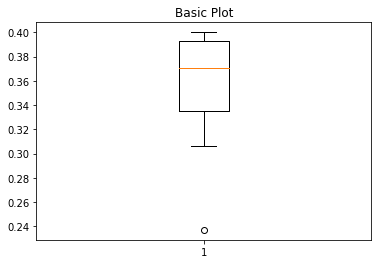

In [78]:
from sklearn.svm import SVC
from sklearn import svm, datasets
#svclassifier_rbf = SVC(kernel='rbf')  
#clf = svclassifier_rbf.fit(X_train, y_train)  
#Defining the linear svm classifier
clf=svm.LinearSVC()
#clf = svm.SVC(gamma='scale', random_state=0)
myout=ml_algorithm_screening_face(X,y,clf,'svm','accuracy',20,10)
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(myout)
#print(myoutput)

<span style="color:red">**(b)**</span>**Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimension.**

**Write your code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.2(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the medium and the interquartile range of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

<div style="text-align: right"> <span style="color:red">**[15 points]**<span> </div>

In [79]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

import matplotlib.pyplot as plt
import numpy as np
fig1, ax1 = plt.subplots()
%matplotlib inline
moreoutputs = []

for i in range(10,160,10):
    print("The result for "+str(i)+" dimensions is:")
    #print(ml_algorithm_screening_face(X,y,clf,'svm','accuracy',i,10))
    resp = ml_algorithm_screening_face(X,y,clf,'svm','accuracy',i,10)
    moreoutputs.append(resp)
    print(resp)
    print("\n")
    moreoutputs.append(resp)
# [insert your code here]

The result for 10 dimensions is:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 27.376% (2.866%)
[0.28888889 0.25185185 0.22222222 0.25185185 0.28888889 0.28148148
 0.25185185 0.31851852 0.31343284 0.26865672]


The result for 20 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 35.608% (3.503%)
[0.35555556 0.34074074 0.37037037 0.33333333 0.44444444 0.3037037
 0.34814815 0.35555556 0.37313433 0.3358209 ]


The result for 30 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 41.688% (4.199%)
[0.40740741 0.4        0.40740741 0.40740741 0.40740741 0.37037037
 0.45925926 0.51851852 0.36567164 0.42537313]


The result for 40 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.7s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 47.850% (5.116%)
[0.43703704 0.43703704 0.51111111 0.48888889 0.53333333 0.37777778
 0.45925926 0.56296296 0.50746269 0.47014925]


The result for 50 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 48.001% (5.031%)
[0.45185185 0.40740741 0.48148148 0.43703704 0.54814815 0.57037037
 0.45925926 0.42962963 0.5        0.51492537]


The result for 60 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 53.113% (2.289%)
[0.51851852 0.53333333 0.56296296 0.52592593 0.53333333 0.55555556
 0.48888889 0.56296296 0.50746269 0.52238806]


The result for 70 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 52.822% (5.340%)
[0.46666667 0.54814815 0.51851852 0.5037037  0.64444444 0.52592593
 0.44444444 0.53333333 0.58208955 0.51492537]


The result for 80 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.0s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 59.349% (4.818%)
[0.66666667 0.51111111 0.6        0.5037037  0.60740741 0.63703704
 0.58518519 0.61481481 0.59701493 0.6119403 ]


The result for 90 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.6s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 55.123% (3.714%)
[0.58518519 0.55555556 0.56296296 0.53333333 0.54814815 0.57777778
 0.45925926 0.52592593 0.56716418 0.59701493]


The result for 100 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 58.681% (4.331%)
[0.6        0.54074074 0.57777778 0.54814815 0.66666667 0.57037037
 0.64444444 0.52592593 0.61940299 0.57462687]


The result for 110 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.8s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 62.843% (5.727%)
[0.60740741 0.57777778 0.60740741 0.54814815 0.7037037  0.57037037
 0.66666667 0.62222222 0.73880597 0.64179104]


The result for 120 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 62.765% (4.495%)
[0.66666667 0.54074074 0.62222222 0.59259259 0.65925926 0.66666667
 0.62222222 0.58518519 0.70149254 0.61940299]


The result for 130 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.1s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 62.760% (4.551%)
[0.63703704 0.57777778 0.68148148 0.57777778 0.71851852 0.62962963
 0.58518519 0.60740741 0.59701493 0.6641791 ]


The result for 140 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.2s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The Accuracy is: 62.767% (4.010%)
[0.65185185 0.54074074 0.59259259 0.59259259 0.65185185 0.64444444
 0.62962963 0.62222222 0.67910448 0.67164179]


The result for 150 dimensions is:


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    9.8s remaining:    6.5s


The Accuracy is: 64.619% (3.922%)
[0.58518519 0.57777778 0.66666667 0.68148148 0.67407407 0.64444444
 0.60740741 0.66666667 0.69402985 0.6641791 ]




[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.9s finished


the different boxplots for different dimensions are as follows:-


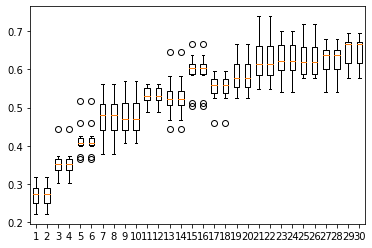

In [80]:
print("the different boxplots for different dimensions are as follows:-")
fig, ax = plt.subplots()
ax.boxplot(moreoutputs)

plt.show()

### <span style="color:#0b486b">Part 3: Outlier Detection Survey  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 13 points]**.<span></div>

You are required to read at least 5 papers relating to outlier detection in the recent 5 years. It will help gain a good understanding how/when to use outlier detection models, how these models work in different datasets. The report needs to include the below points:
- Explain why you choose the five models with at least 0.5 A4 Page at the begining of the report; <span style="color:red">**[3 points]**.</span>
- For each model, you need to do <span style="color:red">**[2 points per model]**.</span>
    - at least 5 outlier detection models with the reference information where the model is published;
    - write 0.5 A4 Page for each model;
    - summarize the full strengths and weakness of each model by clearly presenting the evidence from the experiments declared in their original papers; 
    - Evaluation metrics and available datasets used for each model.

One example report looks like "On the Evaluation of Unsupervised Outlier Detection: Measures, Datasets, and an Empirical Study
by G. O. Campos, A. Zimek, J. Sander, R. J. G. B. Campello, B. Micenková, E. Schubert, I. Assent and M. E. Houle
Data Mining and Knowledge Discovery 30(4): 891-927, 2016, DOI: 10.1007/s10618-015-0444-8". https://link.springer.com/article/10.1007%2Fs10618-015-0444-8.

---
<div style="text-align: center">**END OF ASSIGNMENT ONE**</div>